## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")

In [40]:
data.describe()

,RespondentID
count,1.058000e+03
mean,4.336731e+09
std,4.937834e+05
min,4.335895e+09
25%,4.336339e+09
50%,4.336797e+09
75%,4.337012e+09
max,4.337955e+09


In [41]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [44]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


In [30]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

In [31]:
data = data[data['Do you celebrate Thanksgiving?'] == "Yes"]

In [37]:
data['What is typically the main dish at your Thanksgiving dinner?'].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [47]:
data[data['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey']['Do you typically have gravy?'].value_counts()

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64

In [50]:
piecount = data.iloc[:,26:39]
piecount.stack().value_counts()

Pumpkin                            729
Apple                              514
Pecan                              342
Sweet Potato                       152
Chocolate                          133
Cherry                             114
Other (please specify)              71
None                                40
Key lime                            39
Coconut cream                       36
Buttermilk                          35
Peach                               34
Chess                                3
Lemon                                2
minced meat                          2
Mincemeat                            2
peanut butter                        2
mince meat                           2
mincemeat                            2
We serve pine nut cake not pie       1
Mince meat                           1
berry                                1
Blueberry                            1
Peanut butter                        1
Cocunut custard                      1
Strawberry Rhubarb       

In [53]:
apple_isnull = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"].isnull()
pumpkin_isnull = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"].isnull()
pecan_isnull = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"].isnull()
other_pies = apple_isnull & pumpkin_isnull & pecan_isnull
other_pies.value_counts()

False    876
True     182
dtype: int64

In [55]:
data['Age'].value_counts()

45 - 59    286
60+        264
30 - 44    259
18 - 29    216
Name: Age, dtype: int64

In [59]:
def approx_age(age_string):
    if pd.isnull(age_string):
        return None
    age_string = age_string.split(" ")[0]
    age_string = age_string.replace('+','')
    age_string = age_string.replace('-','')
    
    return int(age_string)

data['int_age'] = data['Age'].apply(approx_age)
data['int_age'].value_counts()

45.0    286
60.0    264
30.0    259
18.0    216
Name: int_age, dtype: int64

In [61]:
data['int_age'].describe()

count    1025.000000
mean       39.383415
std        15.398493
min        18.000000
25%        30.000000
50%        45.000000
75%        60.000000
max        60.000000
Name: int_age, dtype: float64

In [69]:
data[
    'How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts()

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [76]:
import math
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) +int(income_low)) / 2


In [77]:
data['income'] = data['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(clean_income)


In [78]:
data['income'].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

In [80]:
data['income'].value_counts()

37499.5     180
62499.5     135
87499.5     133
112499.5    111
200000.0     80
17499.5      68
4999.5       66
137499.5     49
162499.5     40
187499.5     27
Name: income, dtype: int64

In [82]:
low_dist = data[data['int_income']<50000]['How far will you travel for Thanksgiving?'].value_counts()
100 * low_dist / sum(low_dist)

Thanksgiving is happening at my home--I won't travel at all                         38.129496
Thanksgiving is local--it will take place in the town I live in                     33.093525
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    23.021583
Thanksgiving is out of town and far away--I have to drive several hours or fly       5.755396
Name: How far will you travel for Thanksgiving?, dtype: float64

In [84]:
high_dist = data[data['int_income']>150000]['How far will you travel for Thanksgiving?'].value_counts()
100 * high_dist / sum(high_dist)

Thanksgiving is happening at my home--I won't travel at all                         48.039216
Thanksgiving is local--it will take place in the town I live in                     24.509804
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    15.686275
Thanksgiving is out of town and far away--I have to drive several hours or fly      11.764706
Name: How far will you travel for Thanksgiving?, dtype: float64

In [86]:
pd.pivot_table(data,
    values= 'int_income',
    index= ['Have you ever tried to meet up with hometown friends on Thanksgiving night?'],
    columns=['Have you ever attended a "Friendsgiving?"'])

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


In [87]:
pd.pivot_table(data,
    values= 'int_age',
    index= ['Have you ever tried to meet up with hometown friends on Thanksgiving night?'],
    columns=['Have you ever attended a "Friendsgiving?"'])

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

In [89]:
data['What type of cranberry saucedo you typically have?'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [92]:
homemade = data[data['What type of cranberry saucedo you typically have?'] == 'Homemade']
canned = data[data['What type of cranberry saucedo you typically have?'] == 'Canned']

In [93]:
homemade["income"].mean()

94878.1072874494

In [94]:
canned["income"].mean()

83823.40340909091

In [95]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")

In [96]:
grouped

In [98]:
#grouped.groups

In [101]:
grouped['income'].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [102]:
grouped['income'].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [103]:
grouped['income'].agg([np.mean, np.sum, np.std])

,mean,sum,std
What type of cranberry saucedo you typically have?,,,
Canned,83823.403409,36882297.5,55835.478014
Homemade,94878.107287,23434892.5,62251.937645
None,78886.084034,9387444.0,54562.750866
Other (please specify),86629.978261,1992489.5,54175.781001


In [105]:
grouped = data.groupby( ["What type of cranberry saucedo you typically have?",
                        "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                               4336354418   
                                                   Ham/Pork                                              4336757434   
                                                   I don't know                                          4335987430   
                                                   Other (please specify)                                4336682072   
                                                   Roast beef                                            4336254414   
                                                   Tofurkey                                              4337156546   
                                                   Turkey                                                4336705225   
Homemade                                           Chicken                                               4336539693   
                                                   Ham/Pork                                              4337252861   
                                                   I don't know                                          4336083561   
                                                   Other (please specify)                                4336863306   
                                                   Roast beef                                            4336173790   
                                                   Tofurkey                                              4336789676   
                                                   Turducken                                             4337475308   
                                                   Turkey                                                4336790802   
None                                               Chicken                                               4336150656   
                                                   Ham/Pork                                              4336679896   
                                                   I don't know                                          4336412261   
                                                   Other (please specify)                                4336687790   
                                                   Roast beef                                            4337423740   
                                                   Tofurkey                                              4336950068   
                                                   Turducken                                             4336738591   
                                                   Turkey                                                4336784218   
Other (please specify)                             Ham/Pork                                              4336465104   
                                                   Other (please specify)                                4337335395   
                                                   Tofurkey                                              4336121663   
                                                   Turkey                                                4336724418   

                                                                                                         int_age  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...              
Canned                                             Chicken                                             45.500000   
                                                   Ham/Pork                                            39.857143   
                                                   I don't know                                        18.000000   
                                                   Other (please specif

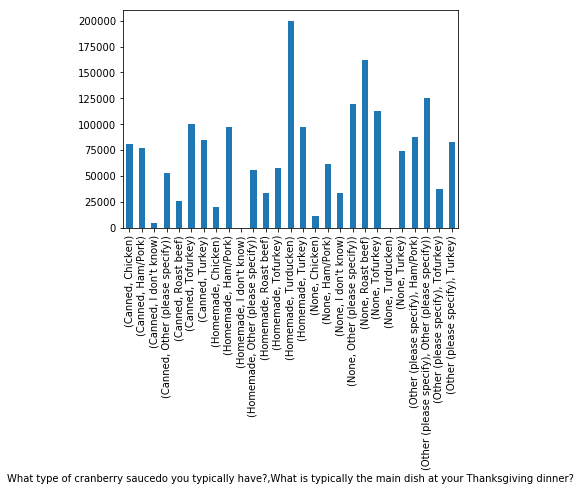

In [106]:
cran_sauce = grouped.agg(np.mean)
cran_sauce["income"].plot(kind='bar')